# Climate Project: South America
## WS 16/17 - G3: Poemnamthip, Gregor, Herla

# 1) General information and notebook preparation

**Author contributions:**

...to be filled out...

**Imports:**

In [1]:
# Display the plots in the notebook:
%matplotlib inline
# Import the tools we are going to need today:
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
# Some defaults:
np.set_printoptions(threshold=20)  # avoid to print very large arrays on screen
# The commands below are to ignore certain warnings.
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

**Prepare Plot - Definition:**

In [2]:
plt.rcParams['figure.figsize'] = (9, 7)

In [3]:
my_extents = [-100, -30, 20, -60]    # extents for map zoom; use when using contourf!

In [4]:
def prepare_plot():
    """This function returns prepared axes for the regional plot.
    
    Usage:
        ax = prepare_plot()
    """
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines();
    xl = ax.gridlines(draw_labels=True);
    xl.xlabels_top = False
    xl.ylabels_right = False
    ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
    return ax

# Analyses

## Atmospheric drivers

Read and select data:

In [5]:
ncdf = xr.open_dataset('data/ERA-Int-MonthlyAvg-4D-TUVWZ.nc')
ds = ncdf.sel(latitude=slice(20, -60), longitude=slice(-100, -30))

### Atmospheric circulation

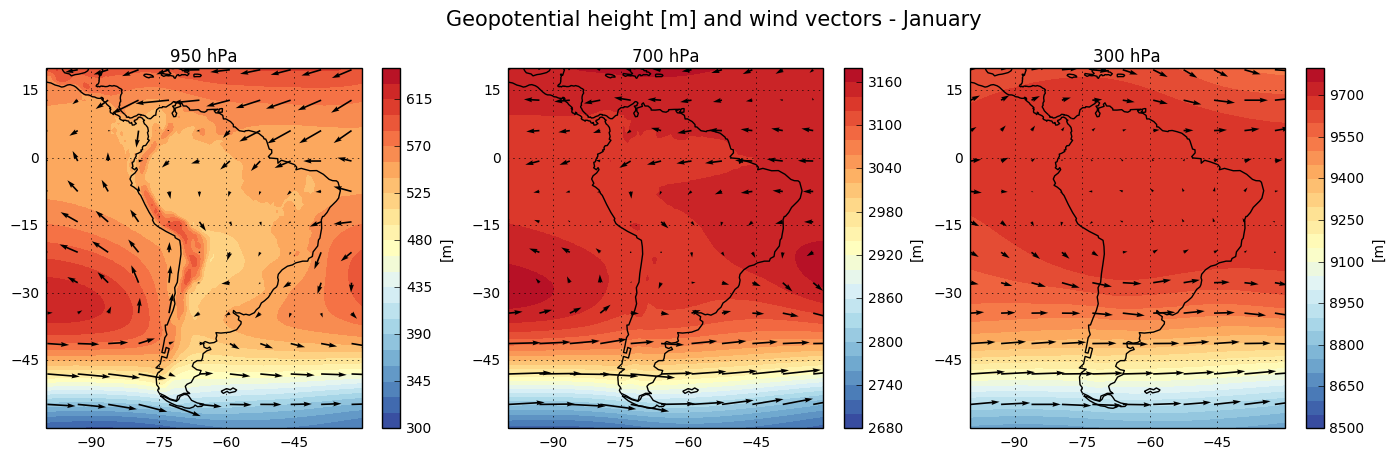

In [6]:
Z = ds.z / 9.81
levels = [950,700,300]                                # change levels as you want!
u_jan_low = ds.u.sel(month=1).sel(level=levels[0])    # vectors for quiver plot at different levels
v_jan_low = ds.v.sel(month=1).sel(level=levels[0])
pu_jan_low, pv_jan_low = u_jan_low[::9,::9], v_jan_low[::9,::9] 

u_jan_mid = ds.u.sel(month=1).sel(level=levels[1])
v_jan_mid = ds.v.sel(month=1).sel(level=levels[1])
pu_jan_mid, pv_jan_mid = u_jan_mid[::9,::9], v_jan_mid[::9,::9] 

u_jan_hi = ds.u.sel(month=1).sel(level=levels[2])
v_jan_hi = ds.v.sel(month=1).sel(level=levels[2])
pu_jan_hi, pv_jan_hi = u_jan_hi[::9,::9], v_jan_hi[::9,::9] 


plt.figure(figsize=(14, 4.5))
ax = plt.subplot(1, 3, 1, projection=ccrs.PlateCarree())
im = Z.sel(month=1).sel(level=levels[0]).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),vmin=300,vmax=640,levels=30,cmap='RdYlBu_r',cbar_kwargs={'label':'[m]'})
qv = ax.quiver(pu_jan_low.longitude, pu_jan_low.latitude, pu_jan_low, pv_jan_low, transform=ccrs.PlateCarree())
ax.coastlines(); xl = ax.gridlines(draw_labels=True); xl.xlabels_top = False; xl.ylabels_right = False
ax.set_extent(my_extents, crs=ccrs.PlateCarree())
plt.title('%d hPa' % (levels[0]))

ax = plt.subplot(1, 3, 2, projection=ccrs.PlateCarree())
Z.sel(month=1).sel(level=levels[1]).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),vmin=2680,vmax=3180,levels=30,cmap='RdYlBu_r',cbar_kwargs={'label':'[m]'})
qv = ax.quiver(pu_jan_mid.longitude, pu_jan_mid.latitude, pu_jan_mid, pv_jan_mid, transform=ccrs.PlateCarree())
ax.coastlines(); xl = ax.gridlines(draw_labels=True); xl.xlabels_top = False; xl.ylabels_right = False
ax.set_extent(my_extents, crs=ccrs.PlateCarree())
plt.title('%d hPa' % (levels[1]))

ax = plt.subplot(1, 3, 3, projection=ccrs.PlateCarree())
Z.sel(month=1).sel(level=levels[2]).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),vmin=8500,vmax=9800,levels=30,cmap='RdYlBu_r',cbar_kwargs={'label':'[m]'})
qv = ax.quiver(pu_jan_hi.longitude, pu_jan_hi.latitude, pu_jan_hi, pv_jan_hi, transform=ccrs.PlateCarree())
ax.coastlines(); xl = ax.gridlines(draw_labels=True); xl.xlabels_top = False; xl.ylabels_right = False
ax.set_extent(my_extents, crs=ccrs.PlateCarree())
plt.title('%d hPa' % (levels[2]))
plt.tight_layout();
plt.suptitle('Geopotential height [m] and wind vectors - January',fontsize=15)
plt.subplots_adjust(top=0.85)


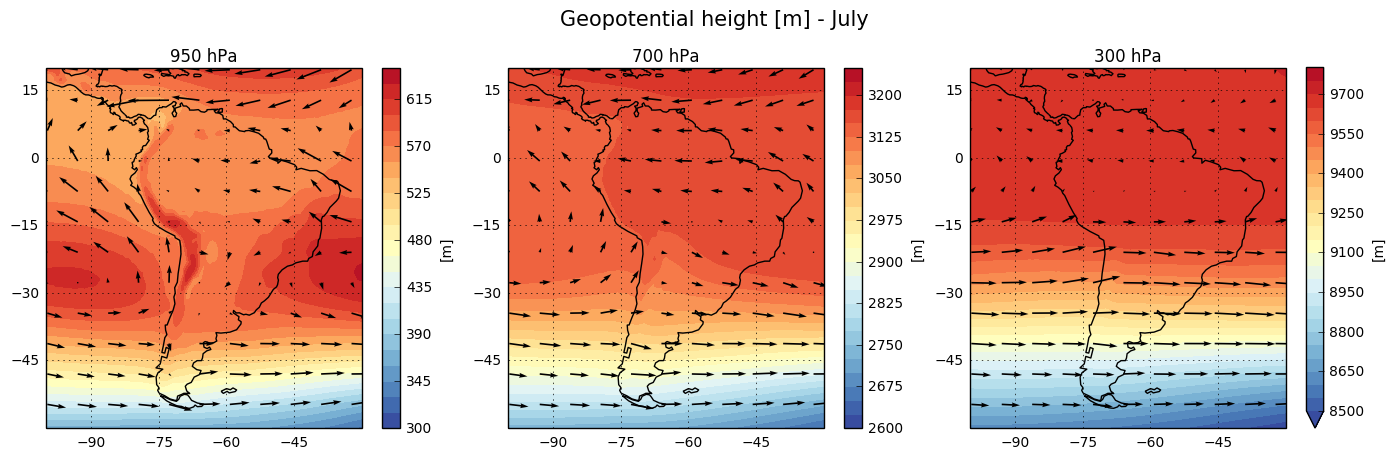

In [7]:
u_jul_low = ds.u.sel(month=7).sel(level=levels[0])    # vectors for quiver plot at different levels
v_jul_low = ds.v.sel(month=7).sel(level=levels[0])
pu_jul_low, pv_jul_low = u_jul_low[::9,::9], v_jul_low[::9,::9] 

u_jul_mid = ds.u.sel(month=7).sel(level=levels[1])
v_jul_mid = ds.v.sel(month=7).sel(level=levels[1])
pu_jul_mid, pv_jul_mid = u_jul_mid[::9,::9], v_jul_mid[::9,::9] 

u_jul_hi = ds.u.sel(month=7).sel(level=levels[2])
v_jul_hi = ds.v.sel(month=7).sel(level=levels[2])
pu_jul_hi, pv_jul_hi = u_jul_hi[::9,::9], v_jul_hi[::9,::9] 


plt.figure(figsize=(14, 4.5))
ax = plt.subplot(1, 3, 1, projection=ccrs.PlateCarree())
im = Z.sel(month=7).sel(level=levels[0]).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),vmin=300,vmax=640,levels=30,cmap='RdYlBu_r',cbar_kwargs={'label':'[m]'})
qv = ax.quiver(pu_jul_low.longitude, pu_jul_low.latitude, pu_jul_low, pv_jul_low, transform=ccrs.PlateCarree())
ax.coastlines(); xl = ax.gridlines(draw_labels=True); xl.xlabels_top = False; xl.ylabels_right = False
ax.set_extent(my_extents, crs=ccrs.PlateCarree())
plt.title('%d hPa' % (levels[0]))

ax = plt.subplot(1, 3, 2, projection=ccrs.PlateCarree())
Z.sel(month=7).sel(level=levels[1]).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),vmin=2600,vmax=3250,levels=30,cmap='RdYlBu_r',cbar_kwargs={'label':'[m]'})
qv = ax.quiver(pu_jul_mid.longitude, pu_jul_mid.latitude, pu_jul_mid, pv_jul_low, transform=ccrs.PlateCarree())
ax.coastlines(); xl = ax.gridlines(draw_labels=True); xl.xlabels_top = False; xl.ylabels_right = False
ax.set_extent(my_extents, crs=ccrs.PlateCarree())
plt.title('%d hPa' % (levels[1]))

ax = plt.subplot(1, 3, 3, projection=ccrs.PlateCarree())
Z.sel(month=7).sel(level=levels[2]).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),vmin=8500,vmax=9800,levels=30,cmap='RdYlBu_r',cbar_kwargs={'label':'[m]'})
qv = ax.quiver(pu_jul_hi.longitude, pu_jul_hi.latitude, pu_jul_hi, pv_jul_low, transform=ccrs.PlateCarree())
ax.coastlines(); xl = ax.gridlines(draw_labels=True); xl.xlabels_top = False; xl.ylabels_right = False
ax.set_extent(my_extents, crs=ccrs.PlateCarree())
plt.title('%d hPa' % (levels[2]))
plt.tight_layout();
plt.suptitle('Geopotential height [m] - July',fontsize=15)
plt.subplots_adjust(top=0.85)

Read data for Sea Level Pressure:

In [8]:
ncdf_slp = xr.open_dataset('data/ERA-Int-MonthlyAvg-UVSLP.nc')
ds_slp = ncdf_slp.sel(latitude=slice(20, -60), longitude=slice(-100, -30))

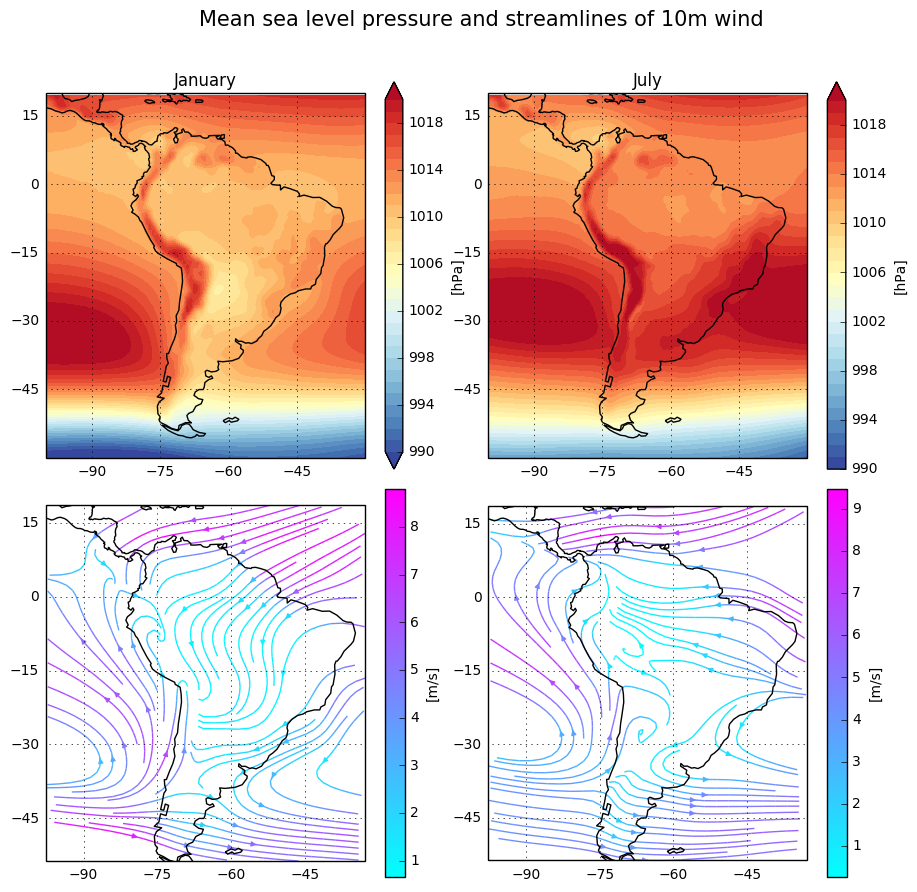

In [9]:
pu_jan, pv_jan = ds_slp.u10.sel(month=1)[::9,::9], ds_slp.v10.sel(month=1)[::9,::9]
pu_jul, pv_jul = ds_slp.u10.sel(month=7)[::9,::9], ds_slp.v10.sel(month=7)[::9,::9]

ws_jan = (pu_jan**2 + pv_jan**2)**0.5
ws_jul = (pu_jul**2 + pv_jul**2)**0.5

msl_jan = ds_slp.msl.sel(month=1) / 100   # [hPa]
msl_jul = ds_slp.msl.sel(month=7) / 100   # [hPa]

plt.figure(figsize=(9, 9))
ax = plt.subplot(2, 2, 1, projection=ccrs.PlateCarree())
im = msl_jan.plot.contourf(ax=ax, transform=ccrs.PlateCarree(),vmin=990,vmax=1020,levels=30,cmap='RdYlBu_r',cbar_kwargs={'label':'[hPa]'})
ax.coastlines(); xl = ax.gridlines(draw_labels=True); xl.xlabels_top = False; xl.ylabels_right = False
ax.set_extent(my_extents, crs=ccrs.PlateCarree())
plt.title('January')
ax = plt.subplot(2, 2, 3, projection=ccrs.PlateCarree())
strm = ax.streamplot(pu_jan.longitude, pu_jan.latitude, pu_jan.values, pv_jan.values, transform=ccrs.PlateCarree(),density=5, color=ws_jan.values, cmap=plt.get_cmap('cool'))
plt.colorbar(strm.lines,label='[m/s]')
ax.coastlines(); xl = ax.gridlines(draw_labels=True); xl.xlabels_top = False; xl.ylabels_right = False


ax = plt.subplot(2, 2, 2, projection=ccrs.PlateCarree())
im = msl_jul.plot.contourf(ax=ax, transform=ccrs.PlateCarree(),vmin=990,vmax=1020,levels=30,cmap='RdYlBu_r',cbar_kwargs={'label':'[hPa]'})
ax.coastlines(); xl = ax.gridlines(draw_labels=True); xl.xlabels_top = False; xl.ylabels_right = False
ax.set_extent(my_extents, crs=ccrs.PlateCarree())
plt.title('July')
ax = plt.subplot(2, 2, 4, projection=ccrs.PlateCarree())
strm = ax.streamplot(pu_jul.longitude, pu_jul.latitude, pu_jul.values, pv_jul.values, transform=ccrs.PlateCarree(),density=5, color=ws_jul.values, cmap=plt.get_cmap('cool'))
plt.colorbar(strm.lines,label='[m/s]')
ax.coastlines(); xl = ax.gridlines(draw_labels=True); xl.xlabels_top = False; xl.ylabels_right = False
plt.suptitle('Mean sea level pressure and streamlines of 10m wind',fontsize=15)
plt.tight_layout();
plt.subplots_adjust(top=0.9)

## Temperature and Precipitation

### Seasonality

Temperature data available in 'ds'.  


In [10]:
ncdf_t2m = xr.open_dataset('data/ERA-Int-Monthly-2mTemp.nc')
ds_t2m = ncdf_t2m.sel(latitude=slice(20, -60), longitude=slice(-100, -30))

t2m = ds_t2m.t2m - 273.15     # °C
t2m_monthly=t2m.groupby('time.month').mean(dim='time')    # calculate monthly mean

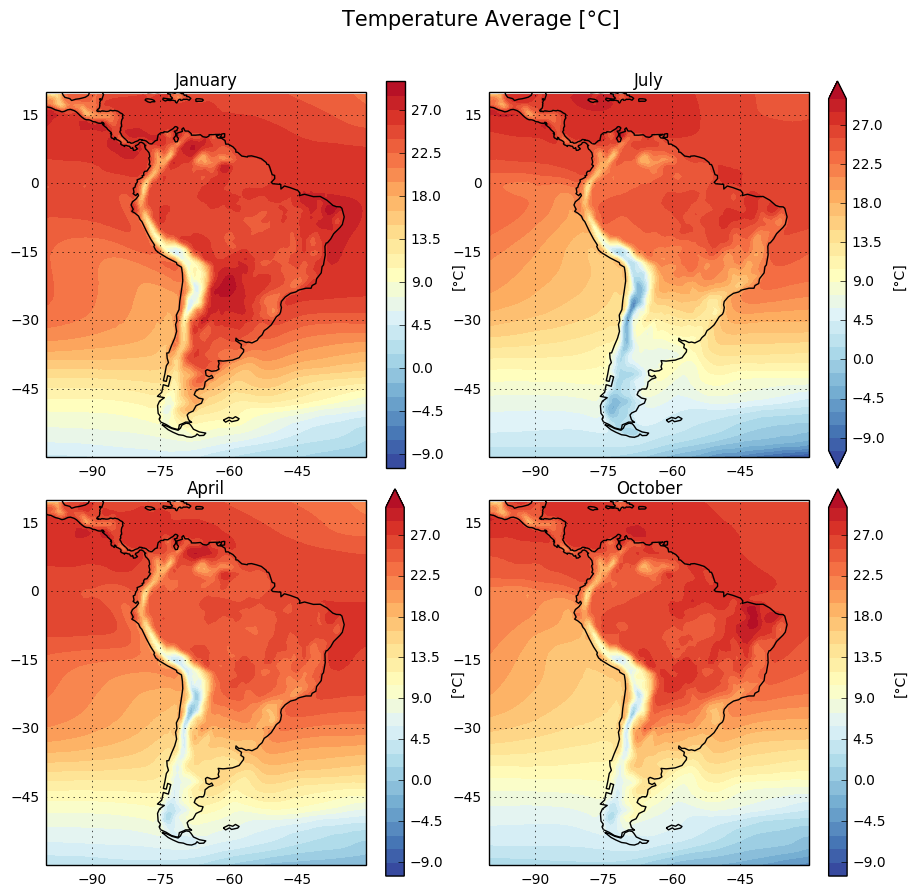

In [11]:
plt.figure(figsize=(9, 9))
ax = plt.subplot(2, 2, 1, projection=ccrs.PlateCarree())
im = t2m_monthly.sel(month=1).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),vmin=-10,vmax=30,levels=30,cmap='RdYlBu_r',cbar_kwargs={'label':'[°C]'})
ax.coastlines(); xl = ax.gridlines(draw_labels=True); xl.xlabels_top = False; xl.ylabels_right = False
ax.set_extent(my_extents, crs=ccrs.PlateCarree())
plt.title('January')
ax = plt.subplot(2, 2, 3, projection=ccrs.PlateCarree())
im = t2m_monthly.sel(month=4).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),vmin=-10,vmax=30,levels=30,cmap='RdYlBu_r',cbar_kwargs={'label':'[°C]'})
ax.coastlines(); xl = ax.gridlines(draw_labels=True); xl.xlabels_top = False; xl.ylabels_right = False
ax.set_extent(my_extents, crs=ccrs.PlateCarree())
plt.title('April')
ax = plt.subplot(2, 2, 2, projection=ccrs.PlateCarree())
im = t2m_monthly.sel(month=7).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),vmin=-10,vmax=30,levels=30,cmap='RdYlBu_r',cbar_kwargs={'label':'[°C]'})
ax.coastlines(); xl = ax.gridlines(draw_labels=True); xl.xlabels_top = False; xl.ylabels_right = False
ax.set_extent(my_extents, crs=ccrs.PlateCarree())
plt.title('July')
ax = plt.subplot(2, 2, 4, projection=ccrs.PlateCarree())
im = t2m_monthly.sel(month=10).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),vmin=-10,vmax=30,levels=30,cmap='RdYlBu_r',cbar_kwargs={'label':'[°C]'})
ax.coastlines(); xl = ax.gridlines(draw_labels=True); xl.xlabels_top = False; xl.ylabels_right = False
ax.set_extent(my_extents, crs=ccrs.PlateCarree())
plt.title('October')
plt.tight_layout();
plt.suptitle('Temperature Average [°C]',fontsize=15)
plt.subplots_adjust(top=0.9)

### Variability

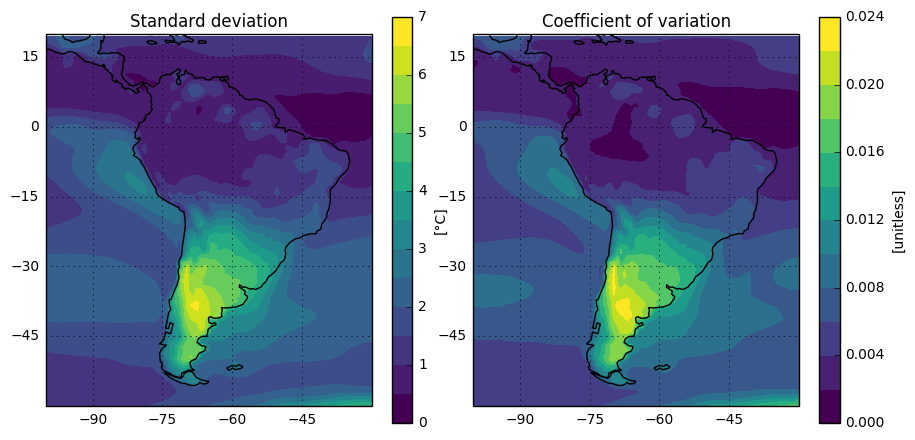

In [12]:
t2m_timeavg = t2m.mean(dim='time') +273.15
t2m_timestd = (t2m+273.15).std(dim='time')
c_v = t2m_timestd / t2m_timeavg     # coefficient of variation (calculation in K!)

plt.figure(figsize=(9, 4.5))
ax = plt.subplot(1, 2, 1, projection=ccrs.PlateCarree())
im = t2m_timestd.plot.contourf(ax=ax, transform=ccrs.PlateCarree(),levels=15,cbar_kwargs={'label':'[°C]'})
ax.coastlines(); xl = ax.gridlines(draw_labels=True); xl.xlabels_top = False; xl.ylabels_right = False
ax.set_extent(my_extents, crs=ccrs.PlateCarree())
plt.title('Standard deviation')

ax = plt.subplot(1, 2, 2, projection=ccrs.PlateCarree())
im = c_v.plot.contourf(ax=ax, transform=ccrs.PlateCarree(),levels=15,cbar_kwargs={'label':'[unitless]'})
ax.coastlines(); xl = ax.gridlines(draw_labels=True); xl.xlabels_top = False; xl.ylabels_right = False
ax.set_extent(my_extents, crs=ccrs.PlateCarree())
plt.title('Coefficient of variation')
plt.tight_layout()

### Time series of annual cycle

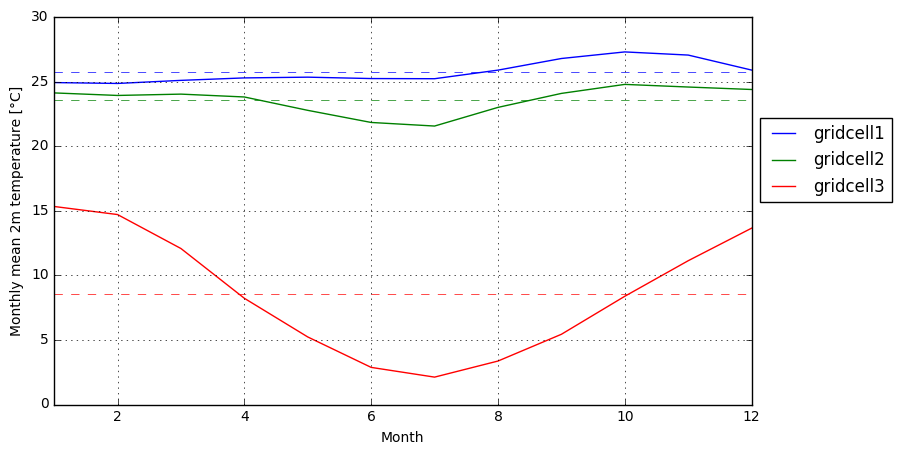

In [14]:
gridcell3 = [-73, -68, -45, -40]   # Patagonia
gridcell2 = [-70, -65, -15, -10]   # Altiplano
gridcell1 = [-55, -50, 0, 5]   # Brazil (?)

t2m_monthly_gc1 = t2m_monthly.sel(latitude=slice(gridcell1[3],gridcell1[2]), longitude=slice(gridcell1[0], gridcell1[1]))
t2m_monthly_gc2 = t2m_monthly.sel(latitude=slice(gridcell2[3],gridcell2[2]), longitude=slice(gridcell2[0], gridcell2[1]))
t2m_monthly_gc3 = t2m_monthly.sel(latitude=slice(gridcell3[3],gridcell3[2]), longitude=slice(gridcell3[0], gridcell3[1]))

t2m_monthly_gc1 = t2m_monthly_gc1.mean(dim=['latitude','longitude'])
t2m_monthly_gc2 = t2m_monthly_gc2.mean(dim=['latitude','longitude'])
t2m_monthly_gc3 = t2m_monthly_gc3.mean(dim=['latitude','longitude'])

t2m_annual_gc1 = t2m_monthly_gc1.mean(dim='month')
t2m_annual_gc2 = t2m_monthly_gc2.mean(dim='month')
t2m_annual_gc3 = t2m_monthly_gc3.mean(dim='month')

plt.figure(figsize=(9,5))
t2m_monthly_gc1.plot(color='blue',label='gridcell1')
plt.plot(np.arange(1,13,1),np.dot(t2m_annual_gc1,np.ones(12)),'b--',linewidth=0.5)
t2m_monthly_gc2.plot(color='green',label='gridcell2')
plt.plot(np.arange(1,13,1),np.dot(t2m_annual_gc2,np.ones(12)),'g--',linewidth=0.5)
t2m_monthly_gc3.plot(color='red',label='gridcell3')
plt.plot(np.arange(1,13,1),np.dot(t2m_annual_gc3,np.ones(12)),'r--',linewidth=0.5)
plt.xlabel('Month'); plt.ylabel('Monthly mean 2m temperature [°C]')
plt.grid()
plt.xlim(1)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.legend(loc='lower left', bbox_to_anchor=(1, 0.5))